# Análise de RH

### Este conjunto de dados contém informações sobre os funcionários de uma empresa, incluindo sua formação educacional, histórico profissional, dados demográficos e fatores relacionados ao emprego. Ele foi anonimizado para proteger a privacidade e, ao mesmo tempo, fornecer informações valiosas sobre a força de trabalho. Este conjunto de dados pode ser usado para diversas análises relacionadas a RH e à força de trabalho, incluindo retenção de funcionários, avaliações de estrutura salarial, estudos de diversidade e inclusão e análises de padrões de licenças. Pesquisadores, analistas de dados e profissionais de RH podem obter insights valiosos desse conjunto de dados.

### Colunas:

1. Educação: As qualificações educacionais dos funcionários, incluindo grau, instituição e área de estudo.

2. Ano de ingresso: ano em que cada funcionário ingressou na empresa, indicando o tempo de serviço.

3. Cidade: O local ou cidade onde cada funcionário está baseado ou trabalha.

4. Nível de pagamento: categorização dos funcionários em diferentes níveis salariais.

5. Idade: A idade de cada funcionário, fornecendo insights demográficos.

6. Género: Identidade de género dos colaboradores, promovendo a análise da diversidade.

7. Ever Benched: Indica se um funcionário já esteve temporariamente sem trabalho atribuído.

8. Experiência no domínio atual: O número de anos de experiência que os funcionários têm em sua área atual.

9. Sair ou não: uma coluna de destino

# Importação das bibliotecas

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('/content/drive/MyDrive/RH1.csv', sep=';')
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
595,Bachelors,2018,Bangalore,1,27,Male,No,5,0
596,Bachelors,2016,Pune,3,24,Male,No,2,0
597,Bachelors,2012,Bangalore,3,25,Male,No,3,0
598,Bachelors,2017,Bangalore,3,27,Male,No,5,0


In [20]:
df = df.rename(columns={
    'Education': 'Educacao',
    'JoiningYear': 'Ano_de_Ingresso',
    'City': 'Cidade',
    'PaymentTier': 'Nivel_de_Pagamento',
    'Age': 'Idade',
    'Gender': 'Genero',
    'EverBenched': 'Ja_Foi_Bancado',
    'ExperienceInCurrentDomain': 'Experiencia_no_Dominio_Atual',
    'LeaveOrNot': 'Deixar_ou_Nao'
})

In [21]:
df.columns

Index(['Educacao', 'Ano_de_Ingresso', 'Cidade', 'Nivel_de_Pagamento', 'Idade',
       'Genero', 'Ja_Foi_Bancado', 'Experiencia_no_Dominio_Atual',
       'Deixar_ou_Nao'],
      dtype='object')

In [22]:
df.describe()

,Ano_de_Ingresso,Nivel_de_Pagamento,Idade,Experiencia_no_Dominio_Atual,Deixar_ou_Nao
count,600.00000,600.000000,600.000000,600.000000,600.000000
mean,2015.04500,2.693333,26.825000,3.066667,0.343333
std,1.84354,0.562568,3.082782,1.346072,0.475218
min,2012.00000,1.000000,22.000000,0.000000,0.000000
25%,2013.00000,2.000000,25.000000,2.000000,0.000000
50%,2015.00000,3.000000,26.000000,3.000000,0.000000
75%,2017.00000,3.000000,28.000000,4.000000,1.000000
max,2018.00000,3.000000,40.000000,5.000000,1.000000


In [23]:
df.isnull().sum()

Educacao                        0
Ano_de_Ingresso                 0
Cidade                          0
Nivel_de_Pagamento              0
Idade                           0
Genero                          0
Ja_Foi_Bancado                  0
Experiencia_no_Dominio_Atual    0
Deixar_ou_Nao                   0
dtype: int64

In [24]:
grupo_education = df.groupby(['Educacao']).size()
grupo_education

Educacao
Bachelors    443
Masters      132
PHD           25
dtype: int64

---
# Qual é a distribuição das qualificações educacionais entre os funcionários?

In [25]:
# Calcular o total de ocorrências
total_ocorrencias = grupo_education.sum()

# Calcular a porcentagem de cada categoria
porcentagem_educacao = (grupo_education / total_ocorrencias) * 100

# Exibir a porcentagem de cada categoria
porcentagem_educacao

Educacao
Bachelors    73.833333
Masters      22.000000
PHD           4.166667
dtype: float64

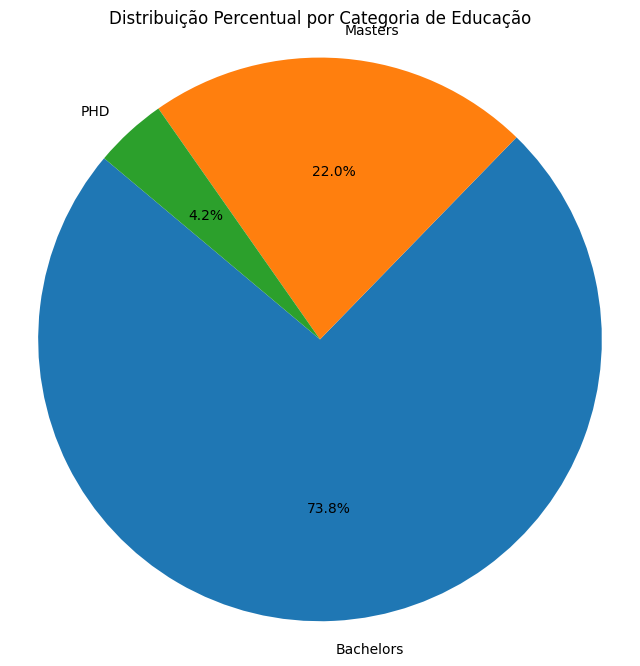

In [26]:
# Definir as labels para as categorias de educação
labels = porcentagem_educacao.index

# Definir as porcentagens como os valores para cada fatia do gráfico de pizza
sizes = porcentagem_educacao.values

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição Percentual por Categoria de Educação')
plt.axis('equal')  # Assegura que o gráfico seja desenhado como um círculo
plt.show()

---
# Como o tempo de serviço (ano de adesão) varia nas diferentes cidades?

In [27]:
# Agrupar os dados por cidade e calcular o tamanho de cada grupo
tamanho_por_cidade = df.groupby('Cidade').size()

# Exibir o tamanho de cada grupo (número de funcionários) em diferentes cidades
tamanho_por_cidade

Cidade
Bangalore    279
New Delhi    154
Pune         167
dtype: int64

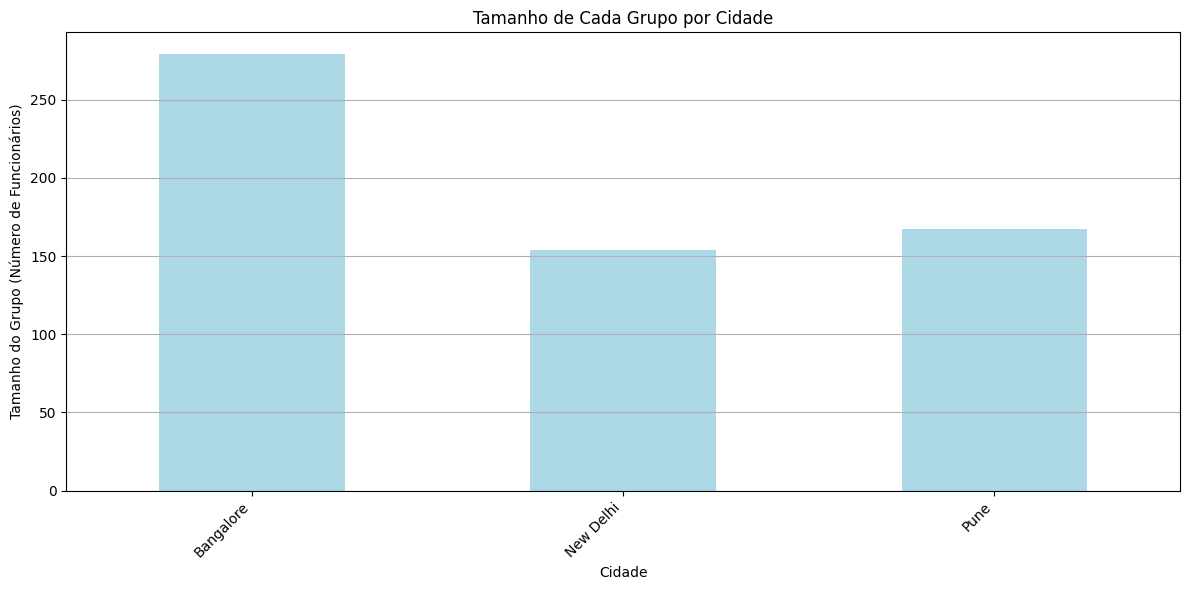

In [28]:
import matplotlib.pyplot as plt

# Criar o gráfico de barras para mostrar o tamanho de cada grupo por cidade
plt.figure(figsize=(12, 6))
tamanho_por_cidade.plot(kind='bar', color='lightblue')
plt.title('Tamanho de Cada Grupo por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Tamanho do Grupo (Número de Funcionários)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


---
# Existe uma relação entre o nível de pagamento e a experiência no domínio atual?

## Teste Chi Quadrado

In [29]:
from scipy.stats import chi2_contingency

# Criar uma tabela de contingência com as variáveis 'Nivel_de_Pagamento' e 'Experiencia_no_Dominio_Atual'
tabela_contingencia = pd.crosstab(df['Nivel_de_Pagamento'], df['Experiencia_no_Dominio_Atual'])

# Executar o teste qui-quadrado de independência
qui_quadrado, p_valor, graus_de_liberdade, _ = chi2_contingency(tabela_contingencia)

# Exibir os resultados
print("Valor de Qui-Quadrado:", qui_quadrado)
print("Valor p:", p_valor)
print("Graus de Liberdade:", graus_de_liberdade)

Valor de Qui-Quadrado: 4.4254676180715835
Valor p: 0.9261193453492331
Graus de Liberdade: 10


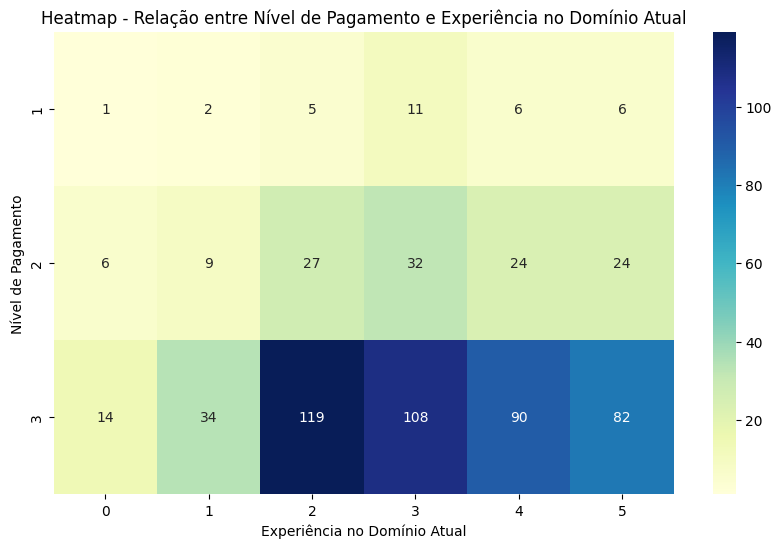

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar o gráfico de heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(tabela_contingencia, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap - Relação entre Nível de Pagamento e Experiência no Domínio Atual')
plt.xlabel('Experiência no Domínio Atual')
plt.ylabel('Nível de Pagamento')
plt.show()

---
# Qual é a distribuição de gênero na força de trabalho?

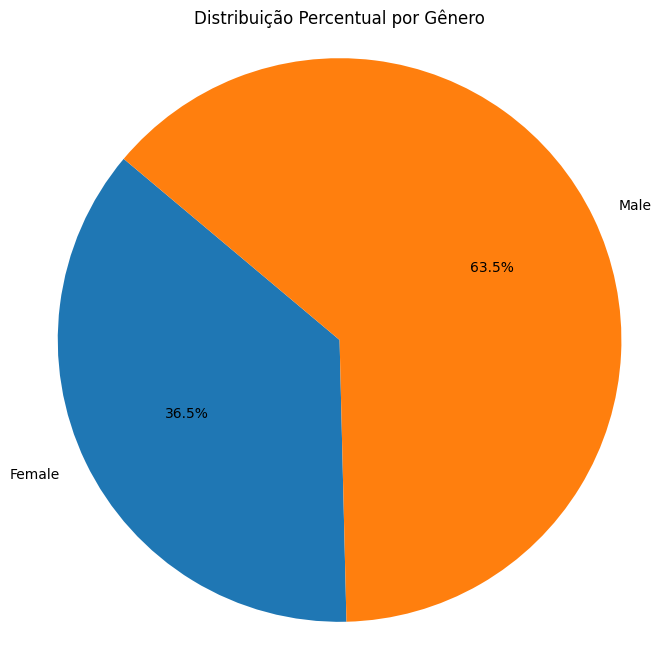

In [31]:
tamanho_por_genero = df.groupby('Genero').size()

# Exibir o tamanho de cada grupo (número de funcionários) por gênero
tamanho_por_genero

# Definir as labels para as categorias de gênero
labels = tamanho_por_genero.index

# Definir os tamanhos dos grupos como os valores para cada fatia do gráfico de pizza
sizes = tamanho_por_genero.values

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição Percentual por Gênero')
plt.axis('equal')  # Assegura que o gráfico seja desenhado como um círculo
plt.show()


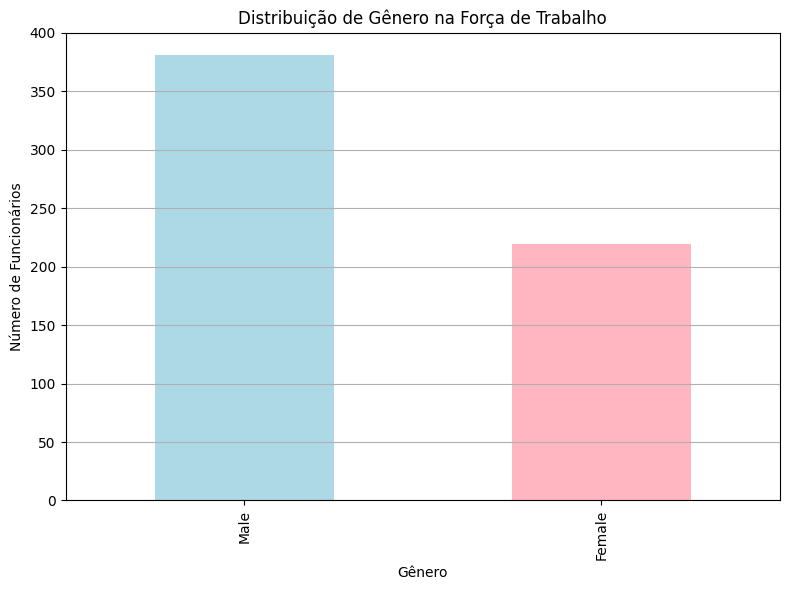

In [32]:
# Calcular o número de funcionários por gênero
contagem_genero = df['Genero'].value_counts()

# Exibir a contagem de funcionários por gênero
contagem_genero

# Criar um gráfico de barras para mostrar a distribuição de gênero
plt.figure(figsize=(8, 6))
contagem_genero.plot(kind='bar', color=['lightblue', 'lightpink'])
plt.title('Distribuição de Gênero na Força de Trabalho')
plt.xlabel('Gênero')
plt.ylabel('Número de Funcionários')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


---
# Existem padrões de comportamento de afastamento entre os funcionários?

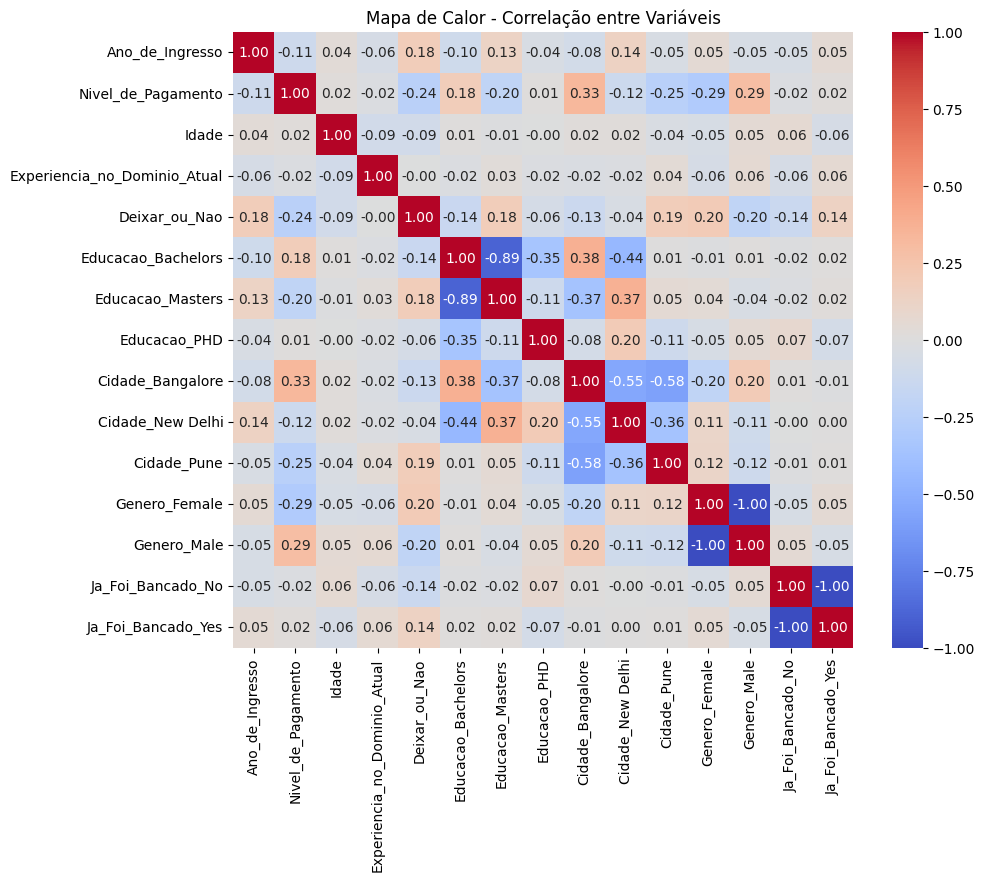

In [33]:
# Codificar variáveis categóricas usando one-hot encoding
df_encoded = pd.get_dummies(df)

# Calcular a matriz de correlação
correlation_matrix = df_encoded.corr()

# Criar o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Mapa de Calor - Correlação entre Variáveis')
plt.show()


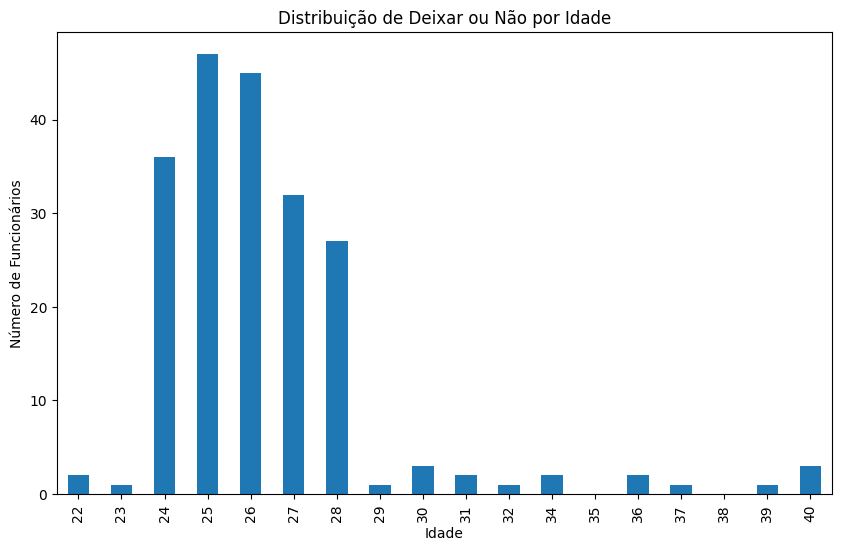

In [34]:
# Calcular a contagem de 'Deixar_ou_Não' por idade
leave_by_age = df.groupby('Idade')['Deixar_ou_Nao'].sum()

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
leave_by_age.plot(kind='bar', stacked=True)
plt.title('Distribuição de Deixar ou Não por Idade')
plt.xlabel('Idade')
plt.ylabel('Número de Funcionários')
plt.show()

<Figure size 1000x600 with 0 Axes>

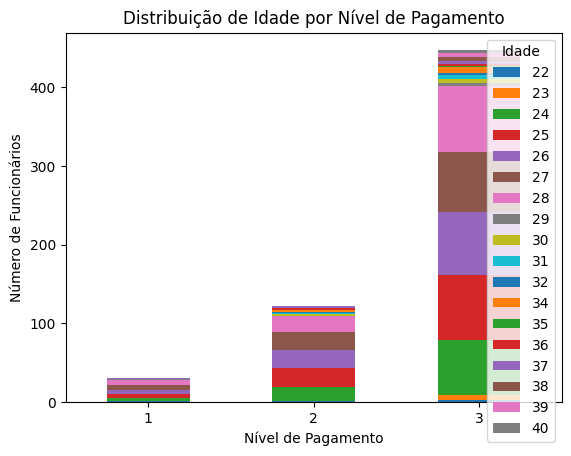

In [35]:
# Agrupar os dados pela variável "Nivel_de_Pagamento" e pela variável "Idade"
grouped_age_by_payment_tier = df.groupby(['Nivel_de_Pagamento', 'Idade']).size().unstack()

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
grouped_age_by_payment_tier.plot(kind='bar', stacked=True)
plt.title('Distribuição de Idade por Nível de Pagamento')
plt.xlabel('Nível de Pagamento')
plt.ylabel('Número de Funcionários')
plt.xticks(rotation=0)
plt.legend(title='Idade', loc='upper right')
plt.show()


---
# Existe diferença entre o nível de escolaridade em relação a idade e nível de pagamento?

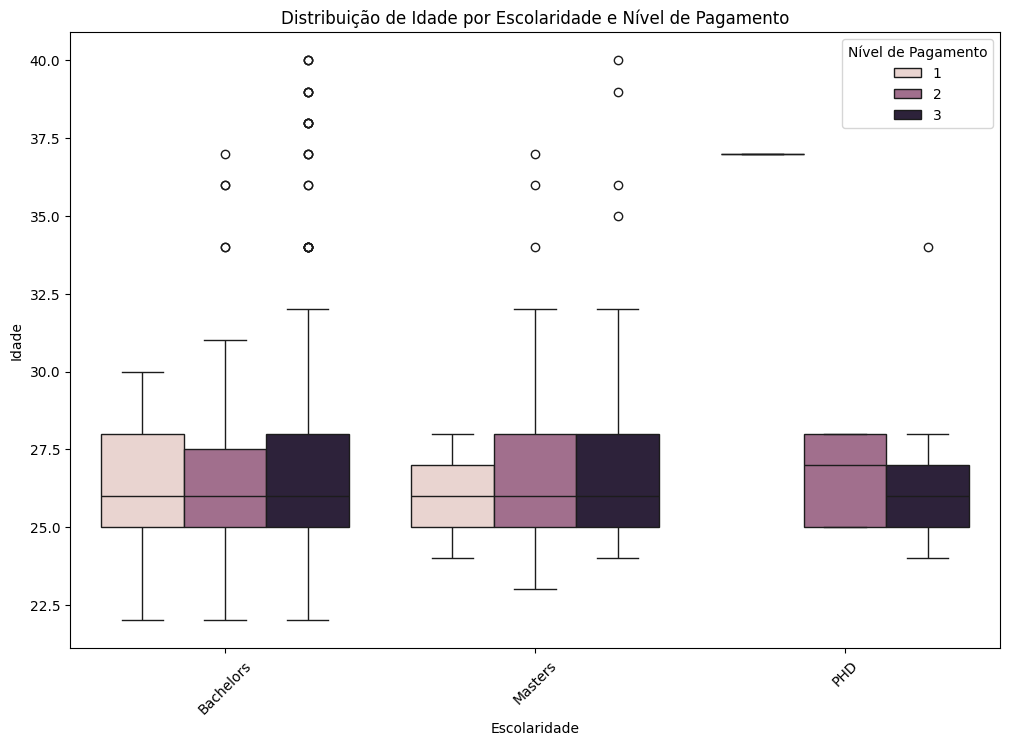

In [36]:
# Criar o boxplot da distribuição da idade por nível de escolaridade e nível de pagamento
plt.figure(figsize=(12, 8))
sns.boxplot(x='Educacao', y='Idade', hue='Nivel_de_Pagamento', data=df)
plt.title('Distribuição de Idade por Escolaridade e Nível de Pagamento')
plt.xlabel('Escolaridade')
plt.ylabel('Idade')
plt.legend(title='Nível de Pagamento', loc='upper right')
plt.xticks(rotation=45)
plt.show()

## Utilizando Qui Quadrado

In [37]:
from scipy.stats import chi2_contingency

# Criar uma tabela de contingência entre as variáveis 'Educacao' e 'Nivel_de_Pagamento'
contingency_table = pd.crosstab(df['Educacao'], df['Nivel_de_Pagamento'])

# Aplicar o teste qui-quadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Imprimir o resultado
print(f"Valor de Qui-Quadrado: {chi2}")
print(f"Valor p: {p_value}")
print(f"Graus de Liberdade: {dof}")

Valor de Qui-Quadrado: 35.24193954271017
Valor p: 4.1429754289472104e-07
Graus de Liberdade: 4


Potenciais questões de pesquisa:
1. Qual é a distribuição das qualificações educacionais entre os funcionários?
    * **A maior frequencia observada é a de Bacharelado**
2. Como o tempo de serviço (ano de adesão) varia nas diferentes cidades?
    * **O tempo é maior em Bangalore**
3. Existe uma relação entre o nível de pagamento e a experiência no domínio atual?
    * **Como o valor p (0.926) é maior do que um nível de significância comum, como 0.05, não temos evidências suficientes para rejeitar a hipótese nula. Portanto, não há uma associação significativa entre o nível de pagamento e a experiência no domínio atual com base nos dados disponíveis.**

4. Qual é a distribuição de gênero na força de trabalho?
    * **Uma distribuição significativa entre homens e mulheres, sendo 63,5% homens e 36,5% mulheres.**
5. Existem padrões de comportamento de afastamento entre os funcionários?
    * **É perceptivel que a faixa etária entre 24 a 28 anos recebem bons salários, o que pode resultar no fato de que são os que mais são demitidos.**
6. Existe diferença entre o nível de escolaridade em relação a idade e nível de pagamento?
    * **Com base no valor extremamente baixo de p, podemos rejeitar a hipótese nula e concluir que há uma associação significativa entre o nível de escolaridade e o nível de pagamento dos funcionários.**
7. Faça um resumo geral sobre os dados.

    **Com base na análise dos dados de RH, observa-se uma predominância de funcionários com formação em Bacharelado, enquanto o tempo de serviço é mais longo em Bangalore. Não foi encontrada uma associação significativa entre o nível de pagamento e a experiência no domínio atual. A distribuição de gênero mostra uma maioria masculina na força de trabalho. Existe uma tendência de demissão entre funcionários com idades entre 24 e 28 anos, possivelmente devido a salários mais altos. Além disso, há uma associação significativa entre o nível de escolaridade e o nível de pagamento dos funcionários, sugerindo que diferentes níveis educacionais estão relacionados a diferentes remunerações. Esses insights fornecem uma compreensão abrangente da composição da força de trabalho e podem informar decisões estratégicas de gestão de recursos humanos.**